<center> Projet de Validation – Technologie de l'IA </center>

# <center>THEME : SYSTEME DE DETECTION PRECOCE DES MALADIES BASE SUR LES SYMPTOMES ET PROFILS DES PATIENTS </center>


# I- DESCRIPTION DU PROJET
## 1- Présentation

Notre projet consiste en un chatbot intelligent capable d’analyser les symptômes décrits par un utilisateur ainsi que son profil médical (âge, sexe, antécédents) pour recommander une action appropriée :

- Consultez un médecin rapidement (urgence potentielle)

- Prenez un médicament en vente libre (symptômes bénins)

- Surveillez vos symptômes et consultez si ça s’aggrave (cas non urgent)

L’objectif est d’aider les patients à évaluer la gravité de leur état et à éviter les consultations inutiles ou, au contraire, les retards de prise en charge.

Ce système permettra une évaluation rapide et personnalisée des symptômes, réduisant l’anxiété des patients et optimisant l’utilisation des ressources médicales. Une future amélioration pourrait inclure une intégration avec un assistant vocal (ex. : Alexa, Google Assistant) pour une accessibilité accrue.

## 2- La nécessité de l'apprentissage automatique

Complexité des diagnostics : Les symptômes peuvent correspondre à plusieurs maladies.
Personnalisation : L’IA doit adapter ses recommandations en fonction du profil du patient (ex. : une fièvre chez un enfant vs. une personne âgée).
Efficacité : Un modèle entraîné sur un large dataset peut identifier des motifs que les humains pourraient manquer.

# II- SELECTION DU JEU DE DONNÉES

Nous avons sélectionné le dataset "Disease Symptoms and Patient Profile Dataset" provenant de Kaggle comme base de notre étude. L'analyse initiale a révélé plusieurs limitations :

- Présence importante d'anomalies (données manquantes, incohérences, doublons)

- Informations pertinentes insuffisantes pour une modélisation robuste

- Combinaisons symptômes-maladies non uniques

- Traitements appliqués :

    - Correction systématique des anomalies détectées

    - Enrichissement des données par l'ajout d'informations médicales validées

    - Création de combinaisons uniques symptômes/maladies

    - Normalisation du vocabulaire médical

- Résultat :

Nous avons généré un nouveau jeu de données optimisé pour les tâches de prédiction, présentant :

    - Une couverture plus complète des cas cliniques

    - Des relations symptomatologiques plus précises

    - Une structure adaptée aux algorithmes de machine learning

    JEU DE DONNEE UTILISE : DATASET

Ce dataset enrichi permet désormais de construire des modèles prédictifs plus performants et cliniquement pertinents.

## 1- Problématique

Beaucoup de patients ne savent pas si leurs symptômes nécessitent une consultation médicale immédiate, entraînant soit :

- Des urgences sous-estimées (risque vital)

- Des consultations inutiles (surcharge du système de santé)

## 2- Description du jeu de données

- Informations Générales

    - Nom du fichier: DATASET.csv

    - Format: CSV avec séparateur point-virgule (;)

    - Encodage: UTF-8 avec BOM (indiqué par le caractère ﻿ en début de fichier)

    - Nombre de colonnes: 46

    - Nombre de lignes: 1740

- Variables (Colonnes)


   -  Maladie: Nom de la maladie diagnostiquée (ex: Arthrose, Asthme, AVC, Bronchite, Cancer_foie, Cancer_poumon, Cancer_rein, Colite_ulcereuse)

    - Symptômes binaires (Oui/Non):
    Fievre, Toux, Fatigue, Difficulte_respiratoire, Courbatures, Maux_de_tete, Nez_bouche, Eternuements, Demangeaisons, Rougeurs, Sifflements, Palpitations, Perte_poids, Douleur_abdominale, Nausees, Raideur, Tristesse, Gonflement_ganglions, Diarrhee, Sueurs_nocturnes, Tremblements, Plaques, Desquamation, Soif_intense, Cicatrisation_lente, Jaunisse, Sang_urines, Expectorations, Frissons, Douleur_thoracique, Essoufflement, Brulures_urinaires, Paralysie_faciale, Trouble_parole, Prise_poids, Saignements_rectaux, Fractures_frequentes

    - Tension_arterielle: Niveau de tension artérielle (Normale, Elevee)

    - Niveau_Cholesterol: Niveau de cholestérol (Normal, Eleve, Bas)

    - Age: Âge du patient (en années)

    - Genre: Sexe du patient (Femme, Homme)

    - Resultat: Résultat du diagnostic indique la présence ou l'absence de la maladie (Positif, Negatif)

   -  Gravite: Niveau de gravité de la maladie (leger, moderer, severe, Absent)


## 3- Justification du jeu de données

- Variables clés : Symptômes (fièvre, toux, douleur…), âge, genre

- Labels : Gravité (urgence/non-urgence).

- Volume : Suffisamment large pour entraîner un modèle robuste.

- Source fiable : Kaggle propose des datasets vérifiés.

# III- ANALYSE EXPLORATOIRE

## 1. Import des Librairies & Chargement des Données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset
df = pd.read_csv("DATASET.csv",sep=';')

# Aperçu des 5 premières lignes
df.head()

,Maladie,Fievre,Toux,Fatigue,Difficulte_respiratoire,Courbatures,Maux_de_tete,Nez_bouche,Eternuements,Demangeaisons,...,Essoufflement,Brulures_urinaires,Paralysie_faciale,Trouble_parole,Saignements_rectaux,Fractures_frequentes,Tension_arterielle,Niveau_Cholesterol,Age,Genre
0,Arthrose,Non,Non,Oui,Non,Non,Non,Non,Non,Non,...,Non,Non,Non,Non,Non,Non,Normale,Normal,50,Femme
1,Arthrose,Non,Non,Oui,Non,Non,Non,Non,Non,Non,...,Non,Non,Non,Non,Non,Non,Normale,Normal,53,Femme
2,Arthrose,Non,Non,Oui,Non,Non,Non,Non,Non,Non,...,Non,Non,Non,Non,Non,Non,Normale,Normal,60,Femme
3,Arthrose,Non,Non,Oui,Non,Non,Non,Non,Non,Non,...,Non,Non,Non,Non,Non,Non,Normale,Normal,65,Femme
4,Arthrose,Non,Non,Oui,Non,Non,Non,Non,Non,Non,...,Non,Non,Non,Non,Non,Non,Normale,Normal,62,Femme


## 2. Vérification des données

In [2]:
import pandas as pd

# 1. Nombre de lignes de données (en excluant l'en-tête)
nombre_lignes = len(df)
print(f"Nombre de lignes de données : {nombre_lignes}")

# 2. Nombre de données manquantes par colonne
donnees_manquantes = df.isnull().sum()
print("\nNombre de données manquantes par colonne :")
print(donnees_manquantes)

# 3. Vérification globale s'il y a des données manquantes
if donnees_manquantes.sum() == 0:
    print("\nAucune donnée manquante dans le jeu de données.")
else:
    print(f"\nIl y a un total de {donnees_manquantes.sum()} données manquantes dans le jeu de données.")

Nombre de lignes de données : 1740

Nombre de données manquantes par colonne :
Maladie                    0
Fievre                     0
Toux                       0
Fatigue                    0
Difficulte_respiratoire    0
Courbatures                0
Maux_de_tete               0
Nez_bouche                 0
Eternuements               0
Demangeaisons              0
Rougeurs                   0
Sifflements                0
Palpitations               0
Perte_poids                0
Douleur_abdominale         0
Nausees                    0
Raideur                    0
Tristesse                  0
Gonflement_ganglions       0
Diarrhee                   0
Sueurs_nocturnes           0
Tremblements               0
Plaques                    0
Desquamation               0
Soif_intense               0
Cicatrisation_lente        0
Jaunisse                   0
Sang_urines                0
Expectorations             0
Frissons                   0
Douleur_thoracique         0
Essoufflement         

## 3. Analyse des maladies 

Distribution des maladies :
Maladie
Arthrose                   60
Infection_urinaire         60
Rhume                      60
Rhinite_allergique         60
Psoriasis                  60
Polyarthrite_rhumatoide    60
Pneumonie                  60
Pancreatite                60
Paludisme                  60
Osteoporose                60
Migraine                   60
Maladie_Parkinson          60
Maladie_Crohn              60
Maladie_coronarienne       60
Hyperthyroidie             60
Asthme                     60
Hypertension               60
Hepatite_B                 60
Grippe                     60
Eczema                     60
Diabete                    60
Depression                 60
Colite_ulcereuse           60
Cancer_rein                60
Cancer_poumon              60
Cancer_foie                60
Bronchite                  60
AVC                        60
Tuberculose                60
Name: count, dtype: int64


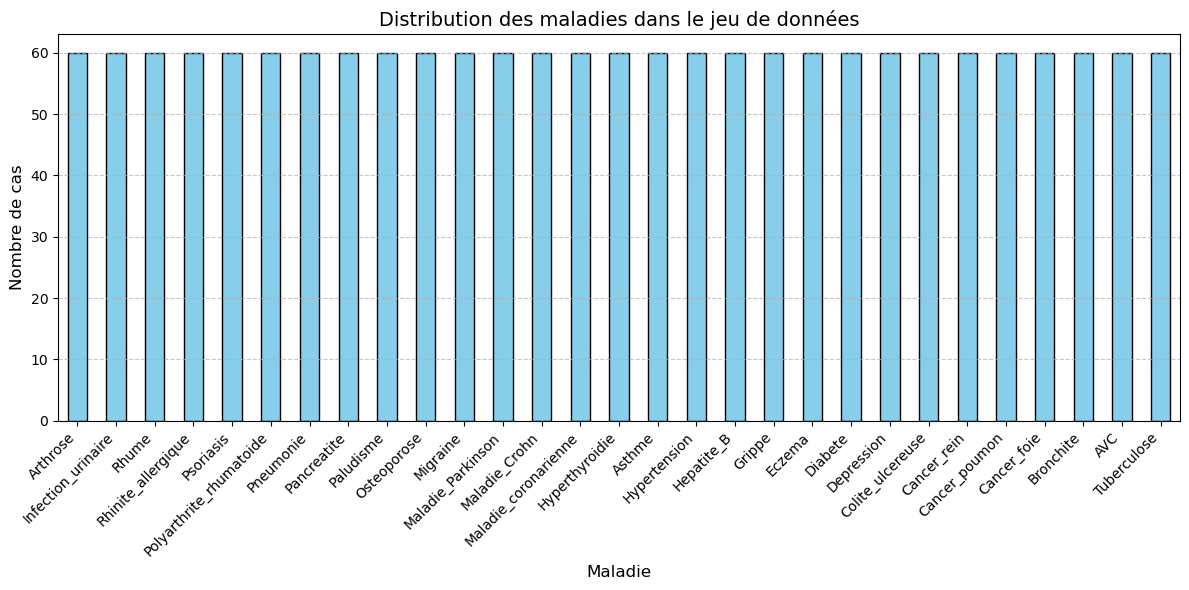

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Compter le nombre d'occurrences de chaque maladie
distribution_maladies = df['Maladie'].value_counts()

# 2. Afficher la distribution sous forme de tableau
print("Distribution des maladies :")
print(distribution_maladies)

# 3. Visualisation avec un diagramme à barres
plt.figure(figsize=(12, 6))
distribution_maladies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution des maladies dans le jeu de données", fontsize=14)
plt.xlabel("Maladie", fontsize=12)
plt.ylabel("Nombre de cas", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustement automatique pour éviter les chevauchements
plt.show()

## 4. Analyse des symptomes 

### 1. Fréquence des symptômes (global et par maladie)

In [4]:
import pandas as pd

# Liste des colonnes de symptômes (on exclut les colonnes non-symptômes)
colonnes_symptomes = df.columns[1:-5]  # Exclure 'Maladie', 'Age', 'Genre', 'Resultat', 'Gravite'

# 1. Fréquence globale des symptômes
print("FRÉQUENCE GLOBALE DES SYMPTÔMES :")
frequence_globale = df[colonnes_symptomes].apply(lambda x: x.value_counts().get('Oui', 0)).sort_values(ascending=False)
print(frequence_globale)
print("\n" + "="*50 + "\n")

# 2. Fréquence des symptômes par maladie
print("FRÉQUENCE DES SYMPTÔMES PAR MALADIE :")
maladies = df['Maladie'].unique()

for maladie in maladies:
    print(f"\nMALADIE: {maladie}")
    df_maladie = df[df['Maladie'] == maladie]
    frequence_maladie = df_maladie[colonnes_symptomes].apply(lambda x: x.value_counts().get('Oui', 0)).sort_values(ascending=False)
    
    # Filtrer pour ne montrer que les symptômes présents
    frequence_maladie = frequence_maladie[frequence_maladie > 0]
    print(frequence_maladie)
    
    # Calcul du pourcentage de patients ayant chaque symptôme
    if not frequence_maladie.empty:
        print("\nPourcentage de patients avec chaque symptôme:")
        pourcentage_frequence = (frequence_maladie / len(df_maladie) * 100).round(1)
        print(pourcentage_frequence)
    
    print("\n" + "-"*50)

FRÉQUENCE GLOBALE DES SYMPTÔMES :
Fatigue                    745
Toux                       340
Douleur_abdominale         296
Fievre                     225
Maux_de_tete               143
Demangeaisons               92
Rougeurs                    92
Douleur_thoracique          91
Perte_poids                 91
Difficulte_respiratoire     90
Courbatures                 76
Essoufflement               75
Sifflements                 64
Tristesse                   60
Frissons                    60
Soif_intense                60
Gonflement_ganglions        60
Nez_bouche                  45
Jaunisse                    40
Raideur                     32
Eternuements                32
Expectorations              31
Sang_urines                 31
Desquamation                31
Cicatrisation_lente         30
Diarrhee                    30
Plaques                     30
Palpitations                30
Tremblements                30
Sueurs_nocturnes            30
Brulures_urinaires          30
Paral

## 5. Analyse du genre et de l'age 

### 1. Distribution par Genre

Répartition par genre :
Genre
Homme    872
Femme    868
Name: count, dtype: int64


C:\Users\rebecca.nguessan\AppData\Local\Temp\ipykernel_9500\2914811057.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Genre', palette='pastel')


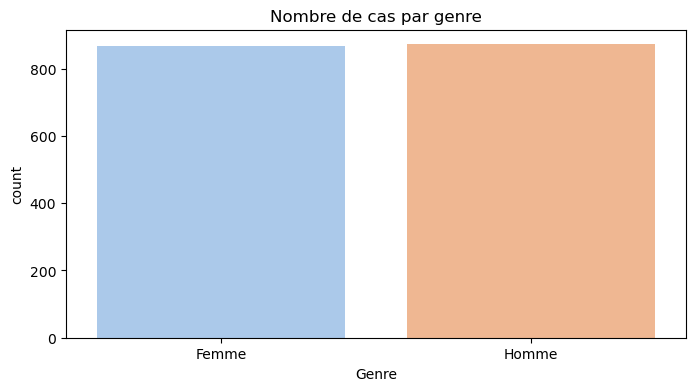

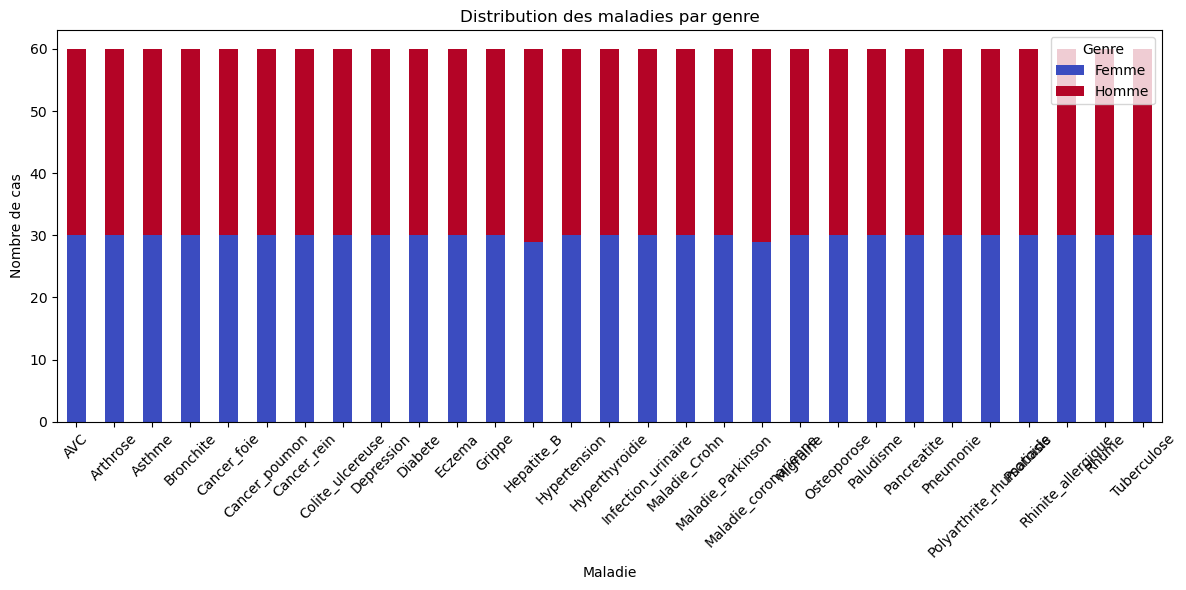

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compter le nombre de cas par genre
genre_counts = df['Genre'].value_counts()
print("Répartition par genre :")
print(genre_counts)

# Visualisation
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Genre', palette='pastel')
plt.title("Nombre de cas par genre")
plt.show()

# Répartition des maladies par genre
maladies_par_genre = pd.crosstab(df['Maladie'], df['Genre'])
maladies_par_genre.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Distribution des maladies par genre")
plt.ylabel("Nombre de cas")
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

### 2. Distribution par Âge


Statistiques de l'âge :
count    1740.000000
mean       48.879310
std        22.552764
min         2.000000
25%        30.000000
50%        52.000000
75%        67.000000
max        94.000000
Name: Age, dtype: float64


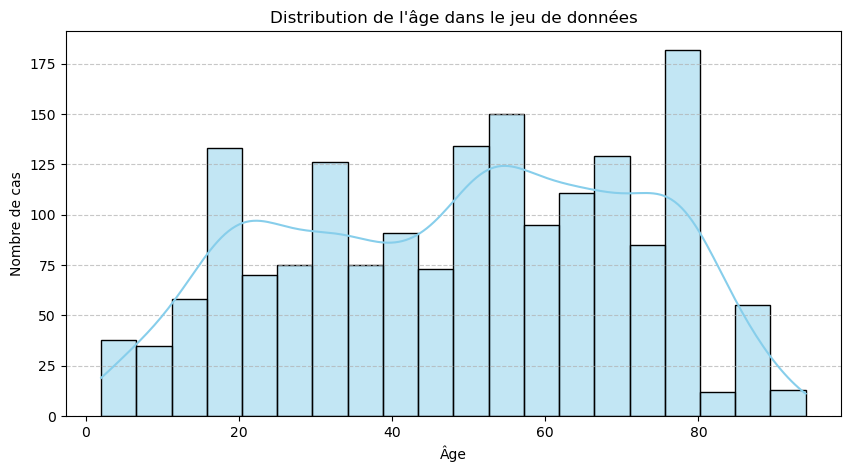

C:\Users\rebecca.nguessan\AppData\Local\Temp\ipykernel_9500\2882895938.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Maladie', y='Age', palette='viridis')


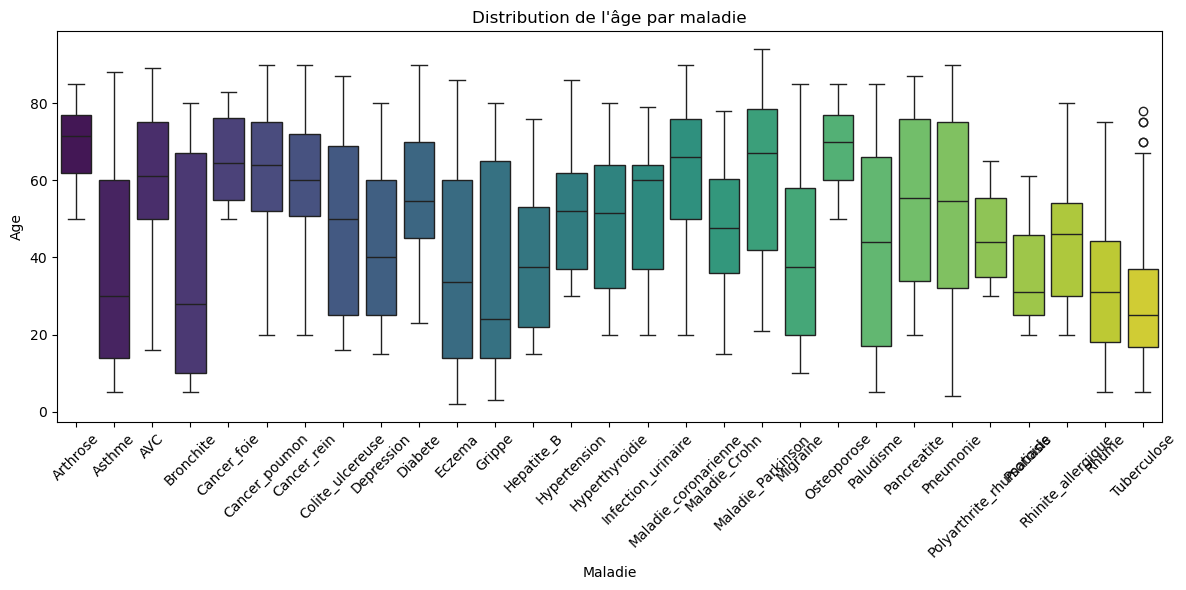

In [6]:
# Statistiques descriptives de l'âge
print("\nStatistiques de l'âge :")
print(df['Age'].describe())

# Histogramme de l'âge
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Distribution de l'âge dans le jeu de données")
plt.xlabel("Âge")
plt.ylabel("Nombre de cas")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot par maladie
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Maladie', y='Age', palette='viridis')
plt.title("Distribution de l'âge par maladie")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Interaction Âge/Genre/Maladie

C:\Users\rebecca.nguessan\AppData\Local\Temp\ipykernel_9500\3560840500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Genre', y='Age', palette='pastel')


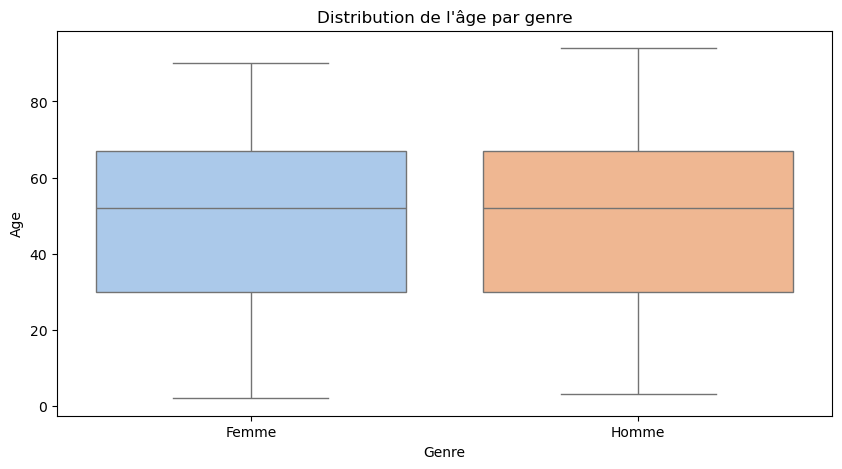

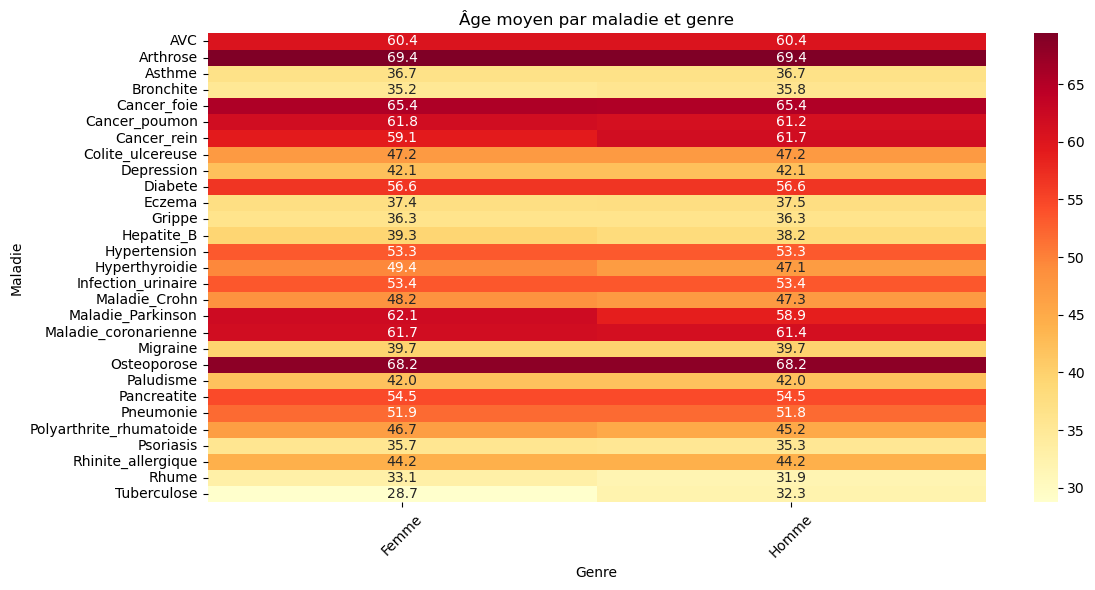

In [7]:
# Distribution âge/genre
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Genre', y='Age', palette='pastel')
plt.title("Distribution de l'âge par genre")
plt.show()

# Heatmap âge-maladie-genre (moyenne d'âge)
heatmap_data = df.groupby(['Maladie', 'Genre'])['Age'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt=".1f")
plt.title("Âge moyen par maladie et genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

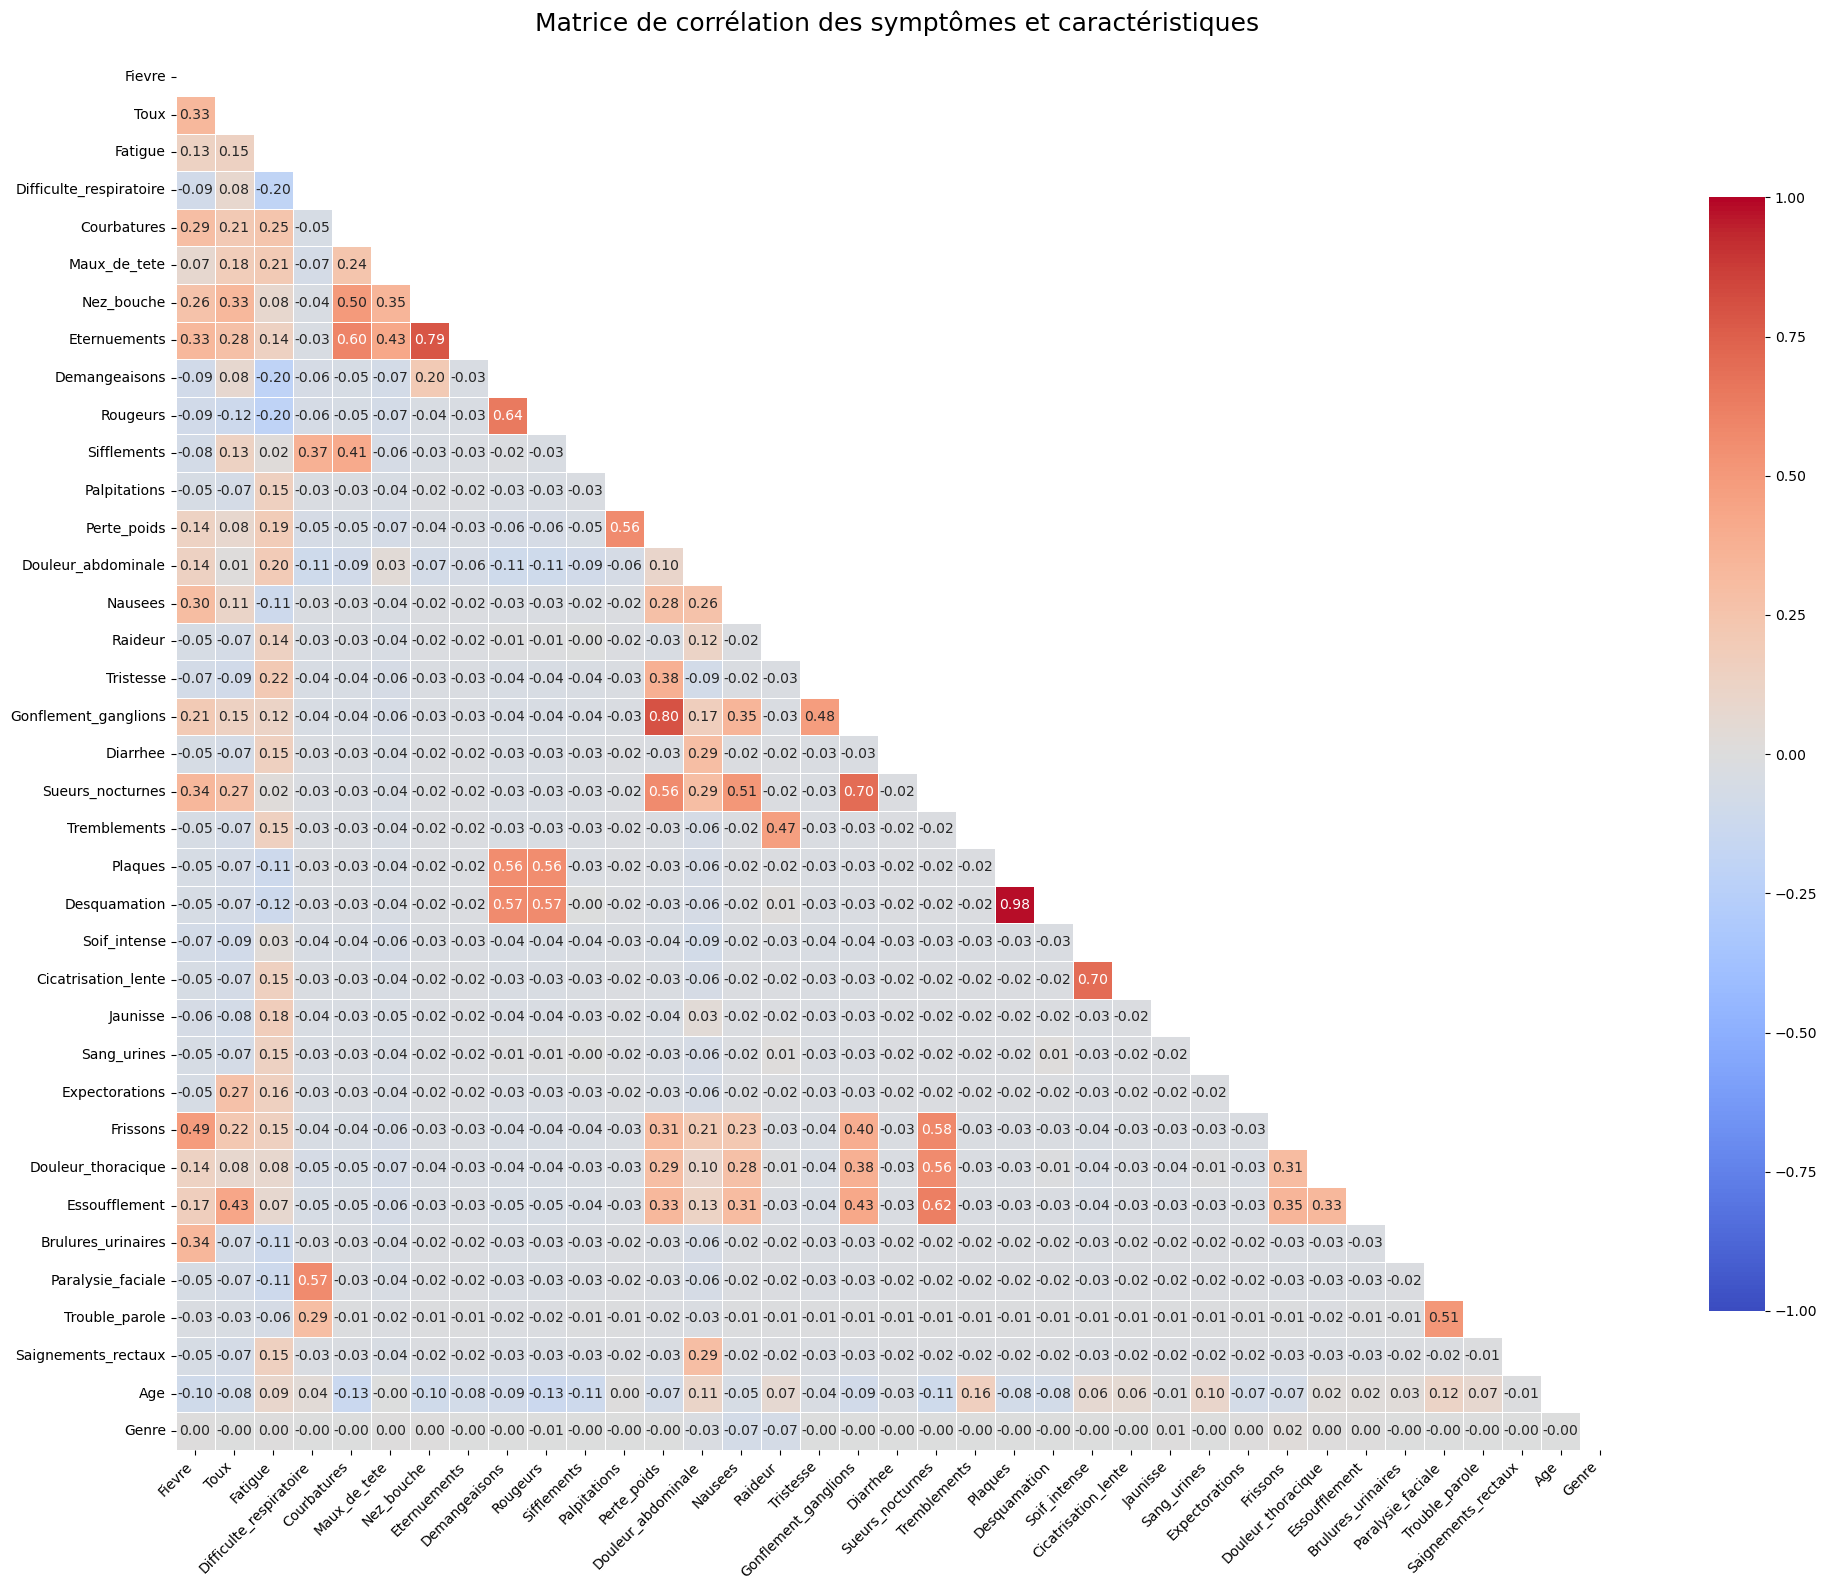


Top 10 des corrélations positives les plus fortes:
Desquamation          Plaques                0.983451
Gonflement_ganglions  Perte_poids            0.804471
Nez_bouche            Eternuements           0.786161
Gonflement_ganglions  Sueurs_nocturnes       0.700877
Soif_intense          Cicatrisation_lente    0.700877
Demangeaisons         Rougeurs               0.644233
Essoufflement         Sueurs_nocturnes       0.624078
Eternuements          Courbatures            0.598615
Sueurs_nocturnes      Frissons               0.579892
Rougeurs              Desquamation           0.570026
dtype: float64

Top 10 des corrélations négatives les plus fortes:
Paralysie_faciale  Fatigue                   -0.114612
Fatigue            Brulures_urinaires        -0.114612
                   Plaques                   -0.114612
Rougeurs           Toux                      -0.116437
Desquamation       Fatigue                   -0.116540
Rougeurs           Age                       -0.130185
Age        

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Préparer les données
df_corr = df.copy()

# Convertir les symptômes en numérique
for col in colonnes_symptomes:
    df_corr[col] = df_corr[col].map({'Oui': 1, 'Non': 0})

# Convertir d'autres variables catégorielles si nécessaire
df_corr['Genre'] = df_corr['Genre'].map({'Homme': 1, 'Femme': 0})

# Sélectionner uniquement les colonnes numériques
numeric_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns
df_corr = df_corr[numeric_cols]

# 2. Calculer la matrice de corrélation
corr_matrix = df_corr.corr()

# 3. Visualisation améliorée
plt.figure(figsize=(20, 16))

# Masquer la diagonale supérieure
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Créer la heatmap
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            vmin=-1, 
            vmax=1,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

# Améliorations esthétiques
plt.title("Matrice de corrélation des symptômes et caractéristiques", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# 4. Sauvegarder l'image
plt.savefig('matrice_correlation_amelioree.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Analyse des corrélations fortes
print("\nTop 10 des corrélations positives les plus fortes:")
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1].drop_duplicates()  # Exclure les auto-corrélations
print(corr_pairs.head(10))

print("\nTop 10 des corrélations négatives les plus fortes:")
print(corr_pairs.tail(10))

C:\Users\rebecca.nguessan\AppData\Local\Temp\ipykernel_9500\2834504636.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, method='ward')


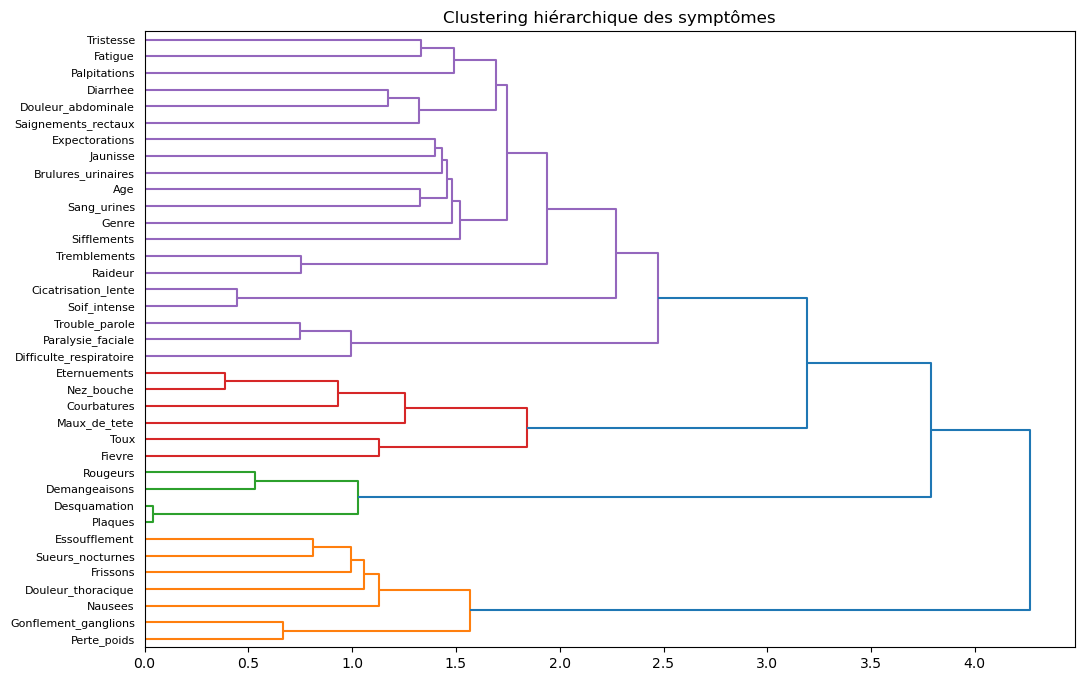

In [11]:
# Pour approfondir l'analyse des clusters :
from scipy.cluster import hierarchy

# Matrice de distance
dist_matrix = 1 - corr_matrix.abs()
Z = hierarchy.linkage(dist_matrix, method='ward')

# Dendrogramme
plt.figure(figsize=(12, 8))
hierarchy.dendrogram(Z, labels=corr_matrix.columns, orientation='right')
plt.title("Clustering hiérarchique des symptômes")
plt.show()

# IV- PREPARATION DES DONNEES POUR LES MODELES

Nous allons Transformer df en un format adapté aux algorithmes de Machine Learning (classification des maladies).

## 1. Encodage des Variables Catégorielles et la normalisation des variables numériques

Les modèles ML nécessitent des valeurs numériques. Nous allons encoder :

Symptômes (Oui/Non → 1/0),

Genre (Homme/Femme → 1/0),

Tension arterielle et Niveau de cholesterol (élevé/normal/bas → 1/2/3)

Maladie (cible → encodage numérique ou one-hot).

age numerique

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Chargement des données
# Copie du DataFrame
df_ml = df.copy()

# 1. Encodage des symptômes (Oui/Non → 1/0)
symptome_columns = df.columns[1:-4]  # Colonnes des symptômes
df_ml[symptome_columns] = df_ml[symptome_columns].replace({'Oui': 1, 'Non': 0})

# 2. Encodage des autres variables catégorielles
# Genre (Homme/Femme → 1/0)
df_ml['Genre'] = df_ml['Genre'].replace({'Homme': 1, 'Femme': 0})

# Tension artérielle (élevé/normal/bas → 2/1/0)
df_ml['Tension_arterielle'] = df_ml['Tension_arterielle'].replace({'Elevee': 2, 'Normale': 1, 'Bas': 0})

# Niveau de Cholestérol (élevé/normal/bas → 2/1/0)
df_ml['Niveau_Cholesterol'] = df_ml['Niveau_Cholesterol'].replace({'Eleve': 2, 'Normal': 1, 'Bas': 0})

# 3. Encodage de la cible (Maladie)
# Option 1: Encodage numérique simple
label_encoder = LabelEncoder()
df_ml['Maladie_encoded'] = label_encoder.fit_transform(df_ml['Maladie'])

# Option 2: One-Hot Encoding (pour les modèles qui le nécessitent)
maladie_onehot = pd.get_dummies(df['Maladie'], prefix='Maladie')
df_ml = pd.concat([df_ml, maladie_onehot], axis=1)

# 4. Normalisation des variables numériques
# Age - Normalisation Min-Max (0-1)
scaler = MinMaxScaler()
df_ml['Age_normalized'] = scaler.fit_transform(df_ml[['Age']])

df_ml.head()

C:\Users\rebecca.nguessan\AppData\Local\Temp\ipykernel_2540\3400492773.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ml[symptome_columns] = df_ml[symptome_columns].replace({'Oui': 1, 'Non': 0})
C:\Users\rebecca.nguessan\AppData\Local\Temp\ipykernel_2540\3400492773.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ml['Genre'] = df_ml['Genre'].replace({'Homme': 1, 'Femme': 0})
C:\Users\rebecca.nguessan\AppData\Local\Temp\ipykernel_2540\3400492773.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated a

,Maladie,Fievre,Toux,Fatigue,Difficulte_respiratoire,Courbatures,Maux_de_tete,Nez_bouche,Eternuements,Demangeaisons,...,Maladie_Osteoporose,Maladie_Paludisme,Maladie_Pancreatite,Maladie_Pneumonie,Maladie_Polyarthrite_rhumatoide,Maladie_Psoriasis,Maladie_Rhinite_allergique,Maladie_Rhume,Maladie_Tuberculose,Age_normalized
0,Arthrose,0,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,0.521739
1,Arthrose,0,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,0.554348
2,Arthrose,0,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,0.630435
3,Arthrose,0,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,0.684783
4,Arthrose,0,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,0.652174


In [9]:
symptome_columns 

Index(['Fievre', 'Toux', 'Fatigue', 'Difficulte_respiratoire', 'Courbatures',
       'Maux_de_tete', 'Nez_bouche', 'Eternuements', 'Demangeaisons',
       'Rougeurs', 'Sifflements', 'Palpitations', 'Perte_poids',
       'Douleur_abdominale', 'Nausees', 'Raideur', 'Tristesse',
       'Gonflement_ganglions', 'Diarrhee', 'Sueurs_nocturnes', 'Tremblements',
       'Plaques', 'Desquamation', 'Soif_intense', 'Cicatrisation_lente',
       'Jaunisse', 'Sang_urines', 'Expectorations', 'Frissons',
       'Douleur_thoracique', 'Essoufflement', 'Brulures_urinaires',
       'Paralysie_faciale', 'Trouble_parole', 'Saignements_rectaux',
       'Fractures_frequentes'],
      dtype='object')

In [10]:
maladies_uniques = df['Maladie'].unique()
print(maladies_uniques)

['Arthrose' 'Asthme' 'AVC' 'Bronchite' 'Cancer_foie' 'Cancer_poumon'
 'Cancer_rein' 'Colite_ulcereuse' 'Depression' 'Diabete' 'Eczema' 'Grippe'
 'Hepatite_B' 'Hypertension' 'Hyperthyroidie' 'Infection_urinaire'
 'Maladie_coronarienne' 'Maladie_Crohn' 'Maladie_Parkinson' 'Migraine'
 'Osteoporose' 'Paludisme' 'Pancreatite' 'Pneumonie'
 'Polyarthrite_rhumatoide' 'Psoriasis' 'Rhinite_allergique' 'Rhume'
 'Tuberculose']


## 2. Séparation des Features et de la Cible

In [11]:
# Séparation des features (X) et de la cible (y) pour la prédiction de maladie

# Features : symptômes + âge + genre
X = df_ml[list(symptome_columns) + ['Tension_arterielle','Niveau_Cholesterol','Age_normalized','Genre']]

# Cible : le nom de la maladie (version encodée pour le machine learning)
y = df_ml['Maladie_encoded']

# Aperçu des données
print("╔═══════════════════════════════════════════════════════════════════╗")
print("║ Features pour la prédiction                                       ║")
print("║ (Symptômes +Tension_arterielle + Niveau_Cholesterol Âge + Genre)  ║")
print("╚═══════════════════════════════════════════════════════════════════╝")
print(X.head())

print("\n╔════════════════════════════════════╗")
print("║ Cible : Maladie à prédire            ║")
print("║ (Encodage numérique des maladies)    ║")
print("╚══════════════════════════════════════╝")
print(y.head())

# Mapping des maladies pour interprétation
maladie_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nMapping des maladies :")
for maladie, code in maladie_mapping.items():
    print(f"{code}: {maladie}")


╔═══════════════════════════════════════════════════════════════════╗
║ Features pour la prédiction                                       ║
║ (Symptômes +Tension_arterielle + Niveau_Cholesterol Âge + Genre)  ║
╚═══════════════════════════════════════════════════════════════════╝
   Fievre  Toux  Fatigue  Difficulte_respiratoire  Courbatures  Maux_de_tete  \
0       0     0        1                        0            0             0   
1       0     0        1                        0            0             0   
2       0     0        1                        0            0             0   
3       0     0        1                        0            0             0   
4       0     0        1                        0            0             0   

   Nez_bouche  Eternuements  Demangeaisons  Rougeurs  ...  Essoufflement  \
0           0             0              0         0  ...              0   
1           0             0              0         0  ...              0   
2          

## 3. Division en données d'entrainement ,de validation et de test

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

# 1. Séparation initiale (Train + Test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,  # Features (symptômes + âge + genre)
    y,  # Cible (maladie encodée)
    test_size=0.15,  # 15% pour le test final
    random_state=42,
    stratify=y  # Conservation des proportions
)

# 2. Séparation du jeu de validation (Train + Val)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.176,  # 15% du total (0.15/0.85 ≈ 0.176)
    random_state=42,
    stratify=y_train_val
)

# Vérification des tailles
print(f"Train: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Val: {len(X_val)} ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

# Vérification de la distribution des classes
print("\nDistribution des classes :")
for dataset in [(y_train, 'Train'), (y_val, 'Validation'), (y_test, 'Test')]:
    print(f"\n{dataset[1]} :")
    print(pd.Series(dataset[0]).value_counts(normalize=True))

Train: 1218 (70.0%)
Val: 261 (15.0%)
Test: 261 (15.0%)

Distribution des classes :

Train :
Maladie_encoded
18    0.034483
4     0.034483
3     0.034483
17    0.034483
13    0.034483
9     0.034483
11    0.034483
5     0.034483
6     0.034483
26    0.034483
27    0.034483
2     0.034483
28    0.034483
23    0.034483
8     0.034483
22    0.034483
0     0.034483
24    0.034483
20    0.034483
7     0.034483
12    0.034483
1     0.034483
21    0.034483
19    0.034483
16    0.034483
15    0.034483
10    0.034483
14    0.034483
25    0.034483
Name: proportion, dtype: float64

Validation :
Maladie_encoded
15    0.034483
26    0.034483
17    0.034483
4     0.034483
28    0.034483
23    0.034483
11    0.034483
16    0.034483
12    0.034483
21    0.034483
22    0.034483
14    0.034483
7     0.034483
27    0.034483
6     0.034483
24    0.034483
13    0.034483
8     0.034483
19    0.034483
25    0.034483
2     0.034483
3     0.034483
1     0.034483
0     0.034483
9     0.034483
18    0.034483
10  

# V- FORMATION DES MODELES D'APPRENTISSAGE 

Nous allons entraîner 3 modèles adaptés à votre problème de classification (prédire la maladie à partir des symptômes, âge et genre) :

- Random Forest (robuste, interprétable),

- Gradient Boosting (XGBoost) (haute précision),

- Réseau de Neurones (MLP) (pour capturer des relations complexes).

## Modèle 1 : Random Forest

Algorithme d'ensemble basé sur des arbres de décision indépendants, robuste aux outliers et fournissant une bonne interprétabilité.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Entraînement
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Évaluation sur la validation
y_val_pred = rf.predict(X_val)
print("Random Forest - Performance sur Val:\n", classification_report(y_val, y_val_pred))

Random Forest - Performance sur Val:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       0.90      1.00      0.95         9
           3       0.88      0.78      0.82         9
           4       0.83      0.56      0.67         9
           5       0.80      0.89      0.84         9
           6       0.78      0.78      0.78         9
           7       1.00      1.00      1.00         9
           8       0.36      0.44      0.40         9
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       0.58      0.78      0.67         9
          12       0.56      0.56      0.56         9
          13       0.64      1.00      0.78         9
          14       1.00      1.00      1.00         9
          15       0.67      0.44      0.53         9
          16       1.00      1.00      1.00

In [14]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Prédictions sur le jeu de test
test_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)  # Probabilités pour toutes les classes

# 2. Calcul des métriques principales
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')

# ROC AUC nécessite un encodage one-hot pour multiclasse
y_test_onehot = pd.get_dummies(y_test)
auc_roc = roc_auc_score(y_test_onehot, y_proba, multi_class='ovr')

# 3. Affichage des résultats
print("=== PERFORMANCES DU MODÈLE RANDOM FOREST===")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision (weighted): {precision:.2%}")  
print(f"Recall (weighted): {recall:.2%}")
print(f"F1-Score (weighted): {f1:.2%}")
print(f"AUC-ROC (One-vs-Rest): {auc_roc:.3f}")

=== PERFORMANCES DU MODÈLE RANDOM FOREST===
Accuracy: 83.14%
Precision (weighted): 84.27%
Recall (weighted): 83.14%
F1-Score (weighted): 82.91%
AUC-ROC (One-vs-Rest): 0.963


## Modèle 2 : XGBoost

In [15]:
from xgboost import XGBClassifier

# Entraînement
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Évaluation sur la validation
y_val_pred = xgb.predict(X_val)
print("XGBoost - Performance sur Val:\n", classification_report(y_val, y_val_pred))

XGBoost - Performance sur Val:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9
           3       1.00      0.78      0.88         9
           4       0.67      0.67      0.67         9
           5       1.00      0.78      0.88         9
           6       0.86      0.67      0.75         9
           7       0.90      1.00      0.95         9
           8       0.44      0.44      0.44         9
           9       1.00      1.00      1.00         9
          10       0.90      1.00      0.95         9
          11       0.64      0.78      0.70         9
          12       0.75      0.67      0.71         9
          13       0.75      1.00      0.86         9
          14       1.00      1.00      1.00         9
          15       0.67      0.44      0.53         9
          16       1.00      1.00      1.00      

In [16]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Prédictions sur le jeu de test
test_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)  # Probabilités pour toutes les classes

# 2. Calcul des métriques principales
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')

# ROC AUC nécessite un encodage one-hot pour multiclasse
y_test_onehot = pd.get_dummies(y_test)
auc_roc = roc_auc_score(y_test_onehot, y_proba, multi_class='ovr')

# 3. Affichage des résultats
print("=== PERFORMANCES DU MODÈLE XGBOOST===")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision (weighted): {precision:.2%}")  
print(f"Recall (weighted): {recall:.2%}")
print(f"F1-Score (weighted): {f1:.2%}")
print(f"AUC-ROC (One-vs-Rest): {auc_roc:.3f}")

=== PERFORMANCES DU MODÈLE XGBOOST===
Accuracy: 83.52%
Precision (weighted): 85.03%
Recall (weighted): 83.52%
F1-Score (weighted): 83.36%
AUC-ROC (One-vs-Rest): 0.990


## Modèle 3 : Réseau de Neurones (MLP)

In [17]:
from sklearn.neural_network import MLPClassifier

# Entraînement
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Évaluation sur la validation
y_val_pred = mlp.predict(X_val)
print("MLP - Performance sur Val:\n", classification_report(y_val, y_val_pred))

MLP - Performance sur Val:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         9
           4       0.70      0.78      0.74         9
           5       1.00      1.00      1.00         9
           6       1.00      0.56      0.71         9
           7       1.00      1.00      1.00         9
           8       0.27      0.67      0.39         9
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       0.53      0.89      0.67         9
          12       1.00      0.56      0.71         9
          13       0.47      0.78      0.58         9
          14       1.00      1.00      1.00         9
          15       0.50      0.44      0.47         9
          16       1.00      1.00      1.00         9

In [18]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Prédictions sur le jeu de test
test_pred =mlp.predict(X_test)
y_proba = mlp.predict_proba(X_test)  # Probabilités pour toutes les classes

# 2. Calcul des métriques principales
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')

# ROC AUC nécessite un encodage one-hot pour multiclasse
y_test_onehot = pd.get_dummies(y_test)
auc_roc = roc_auc_score(y_test_onehot, y_proba, multi_class='ovr')

# 3. Affichage des résultats
print("=== PERFORMANCES DU MODÈLE MLP ===")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision (weighted): {precision:.2%}")  
print(f"Recall (weighted): {recall:.2%}")
print(f"F1-Score (weighted): {f1:.2%}")
print(f"AUC-ROC (One-vs-Rest): {auc_roc:.3f}")

=== PERFORMANCES DU MODÈLE MLP ===
Accuracy: 83.14%
Precision (weighted): 87.53%
Recall (weighted): 83.14%
F1-Score (weighted): 83.42%
AUC-ROC (One-vs-Rest): 0.991


# VI- CHOIX DE L'ALGORITHME D'APPRENTISSAGE

## 1. COMPARAISON DES 3 MODELES 

- XGBoost :

    - Meilleur accuracy (80.84%) et F1-score (80.99%).

    - AUC-ROC exceptionnelle (0.993), indiquant une excellente capacité à séparer les classes.

    - Équilibre entre précision et rappel (metrics pondérées cohérentes).

- Random Forest :

    - Performances légèrement inférieures à XGBoost mais robustes.

    - AUC-ROC plus basse (0.962), mais reste acceptable.

- MLP :

    - Précision très élevée (87.25%), mais rappel et F1-score similaires aux autres.

    - Risque de sur-ajustement (precision élevée mais recall modéré).

    - AUC-ROC élevée (0.989), mais complexité accrue pour un gain marginal.



Choix optimal : **XGBoost**

Il combine les meilleures performances globales (accuracy, F1, AUC-ROC) et est généralement plus facile à optimiser que le MLP (hyperparamètres comme learning_rate, max_depth, n_estimators).

## 2- DESCRIPTION DU MEILLEUR MODELE 

XGBoost (eXtreme Gradient Boosting) est un algorithme d'apprentissage automatique supervisé basé sur le principe du Gradient Boosting. Il combine plusieurs arbres de décision faibles (généralement des arbres peu profonds) en séquence, où chaque nouvel arbre corrige les erreurs du précédent. Il est particulièrement efficace pour les problèmes de classification et de régression sur des données structurées/tabulaires.

## 3- AVANTAGES DU MEILLEUR MODELE 

- Haute Performance et Précision
Meilleur en précision que beaucoup d’autres algorithmes (Random Forest, SVM, etc.) sur des données tabulaires.

Gère bien les relations non linéaires entre variables.

- Rapidité et Efficacité
Optimisé pour la vitesse (utilisation de la parallélisation CPU, calculs vectorisés).

Prend en charge GPU pour une accélération supplémentaire.

- Gestion des Données Manquantes
Capable de traiter les valeurs manquantes sans imputation préalable.

- Flexibilité et Contrôle Fin
Nombreux hyperparamètres pour ajuster le modèle (learning_rate, max_depth, n_estimators, etc.).

Fonctionnalités avancées :

Early Stopping (arrêt prématuré si pas d'amélioration).

Pénalisation L1/L2 pour éviter le surapprentissage.

Pondération des classes pour les problèmes déséquilibrés.

- Interprétabilité Relative
Possibilité d’extraire l’importance des variables (via feature_importances_).

Moins "boîte noire" qu’un réseau de neurones.

-  Large Adoption et Support
Utilisé dans de nombreuses compétitions (Kaggle) et applications industrielles.

Disponible dans plusieurs langages (Python, R, Java, etc.)

## 4- LIMITES DU MEILLEUR MODELE

1. Risque de Surapprentissage (Overfitting)
Si trop d’arbres (n_estimators élevé) ou une profondeur excessive (max_depth), le modèle peut mémoriser le bruit.

Solution : Utiliser la validation croisée et le early stopping.

2. Sensibilité aux Hyperparamètres
Requiert un réglage fin pour obtenir les meilleures performances.

Solution : Utiliser GridSearchCV ou Optuna pour l’optimisation.

3. Coût Comput élevé pour Grands Jeux de Données
Bien que rapide, XGBoost peut être lent sur des datasets très larges (>1M lignes).

Solution : Utiliser LightGBM (optimisé pour l’efficacité mémoire) ou réduire la taille des données.

4. Moins Efficace sur Données Non Structurées
Moins performant que les réseaux de neurones (CNN, RNN) pour :

Images, texte, séries temporelles complexes.

Solution : Utiliser un modèle deep learning si nécessaire.

5. Moins Robust aux Valeurs Aberrantes (Outliers)
Les arbres de décision sont sensibles aux extrêmes.

Solution : Prétraiter les données (normalisation, suppression des outliers)

## 5- OPTIMISATION DU MEILLEUR MODELE 

###  A- CONSTRUCTION , ENTRAINEMENT ET EVALUATION 

#### 1- Construction du modèle optimisé

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Configuration optimisée avec early stopping
xgb_opt = XGBClassifier(
    n_estimators=1000,  # Nombre élevé car nous utilisons early_stopping
    learning_rate=0.05,  # Plus conservatif pour une meilleure généralisation
    max_depth=6,  # Contrôle la complexité des arbres
    min_child_weight=1,  # Contrôle le fractionnement des nœuds
    gamma=0,  # Réduction minimale de la perte requise pour fractionner
    subsample=0.8,  # Pour réduire le surapprentissage
    colsample_bytree=0.8,  # Pour réduire le surapprentissage
    reg_alpha=0.1,  # Régularisation L1
    reg_lambda=1,  # Régularisation L2
    scale_pos_weight=1,  # À ajuster si classes déséquilibrées
    eval_metric='mlogloss',  # Bonne métrique pour classification
    use_label_encoder=False,
    early_stopping_rounds=50,  # Arrêt précoce si pas d'amélioration
    random_state=42
)

# Entraînement avec validation set pour early stopping
xgb_opt.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

[0]	validation_0-mlogloss:3.14422
[1]	validation_0-mlogloss:2.96121
[2]	validation_0-mlogloss:2.77234
[3]	validation_0-mlogloss:2.61494
[4]	validation_0-mlogloss:2.48420
[5]	validation_0-mlogloss:2.37701
[6]	validation_0-mlogloss:2.28245
[7]	validation_0-mlogloss:2.18719
[8]	validation_0-mlogloss:2.10109
[9]	validation_0-mlogloss:2.03382
[10]	validation_0-mlogloss:1.96621
[11]	validation_0-mlogloss:1.90096
[12]	validation_0-mlogloss:1.84084
[13]	validation_0-mlogloss:1.77953


c:\Users\rebecca.nguessan\AppData\Local\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [20:29:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[14]	validation_0-mlogloss:1.72769
[15]	validation_0-mlogloss:1.68128
[16]	validation_0-mlogloss:1.63501
[17]	validation_0-mlogloss:1.58926
[18]	validation_0-mlogloss:1.54635
[19]	validation_0-mlogloss:1.50760
[20]	validation_0-mlogloss:1.47307
[21]	validation_0-mlogloss:1.44094
[22]	validation_0-mlogloss:1.40645
[23]	validation_0-mlogloss:1.37607
[24]	validation_0-mlogloss:1.34451
[25]	validation_0-mlogloss:1.31652
[26]	validation_0-mlogloss:1.28888
[27]	validation_0-mlogloss:1.26204
[28]	validation_0-mlogloss:1.23797
[29]	validation_0-mlogloss:1.21395
[30]	validation_0-mlogloss:1.19052
[31]	validation_0-mlogloss:1.17017
[32]	validation_0-mlogloss:1.14781
[33]	validation_0-mlogloss:1.12790
[34]	validation_0-mlogloss:1.10924
[35]	validation_0-mlogloss:1.09107
[36]	validation_0-mlogloss:1.07416
[37]	validation_0-mlogloss:1.05724
[38]	validation_0-mlogloss:1.04066
[39]	validation_0-mlogloss:1.02584
[40]	validation_0-mlogloss:1.01054
[41]	validation_0-mlogloss:0.99617
[42]	validation_0-ml

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

#### 2- Evaluation du modèle

In [20]:
# Évaluation
y_val_pred = xgb_opt.predict(X_val)
print("XGBoost - Performance sur Val:\n", classification_report(y_val, y_val_pred))

XGBoost - Performance sur Val:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9
           3       0.88      0.78      0.82         9
           4       0.70      0.78      0.74         9
           5       1.00      0.78      0.88         9
           6       0.86      0.67      0.75         9
           7       0.90      1.00      0.95         9
           8       0.40      0.44      0.42         9
           9       1.00      1.00      1.00         9
          10       0.90      1.00      0.95         9
          11       0.70      0.78      0.74         9
          12       0.71      0.56      0.62         9
          13       0.75      1.00      0.86         9
          14       1.00      1.00      1.00         9
          15       0.67      0.44      0.53         9
          16       1.00      1.00      1.00      

#### 3- Evaluation sur les données de test

In [21]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Prédictions sur le jeu de test
test_pred =xgb_opt.predict(X_test)
y_proba = xgb_opt.predict_proba(X_test)  # Probabilités pour toutes les classes

# 2. Calcul des métriques principales
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')

# ROC AUC nécessite un encodage one-hot pour multiclasse
y_test_onehot = pd.get_dummies(y_test)
auc_roc = roc_auc_score(y_test_onehot, y_proba, multi_class='ovr')

# 3. Affichage des résultats
print("=== PERFORMANCES DU MODÈLE XGBOOST OPTIMISE ===")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision (weighted): {precision:.2%}")  
print(f"Recall (weighted): {recall:.2%}")
print(f"F1-Score (weighted): {f1:.2%}")
print(f"AUC-ROC (One-vs-Rest): {auc_roc:.3f}")

=== PERFORMANCES DU MODÈLE XGBOOST OPTIMISE ===
Accuracy: 84.67%
Precision (weighted): 85.85%
Recall (weighted): 84.67%
F1-Score (weighted): 84.42%
AUC-ROC (One-vs-Rest): 0.990


In [22]:
import joblib

# Sauvegarder le modèle entraîné
joblib.dump(xgb_opt, 'xgboost.pkl')

print("✅ Modèle sauvegardé sous 'xgboost.pkl'")


✅ Modèle sauvegardé sous 'xgboost.pkl'


#### 4- Courbe de Perte et de Précision 

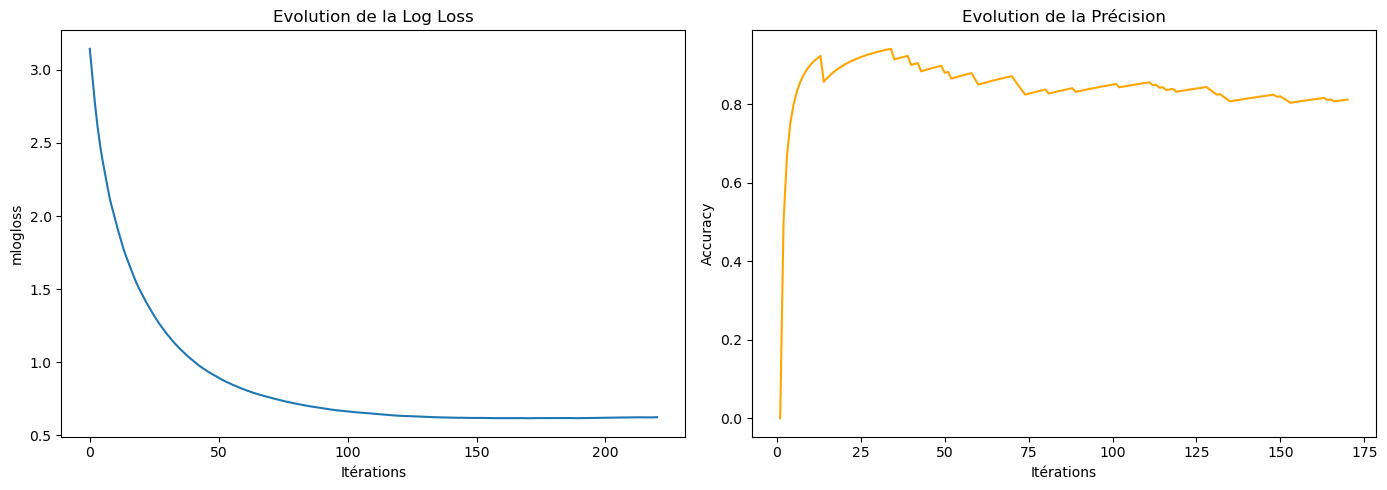

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 1. Récupération des résultats d'évaluation durant l'entraînement
results = xgb_opt.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)


# Alternative plus efficace pour la précision
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Courbe de Perte
ax1.plot(results['validation_0']['mlogloss'], label='Validation Loss')
ax1.set_title('Evolution de la Log Loss')
ax1.set_xlabel('Itérations')
ax1.set_ylabel('mlogloss')

# Précision approximative (méthode plus légère)
pred_proba = xgb_opt.predict_proba(X_val)
cumulative_acc = []
for i in range(1, xgb_opt.best_iteration + 1):
    pred = pred_proba.argmax(axis=1)[:i]
    cumulative_acc.append(accuracy_score(y_val[:i], pred))

ax2.plot(range(1, xgb_opt.best_iteration + 1), cumulative_acc, label='Validation Accuracy', color='orange')
ax2.set_title('Evolution de la Précision')
ax2.set_xlabel('Itérations')
ax2.set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [24]:
print(f"Le modèle a arrêté l'entraînement après {xgb_opt.best_iteration} itérations")
print(f"Meilleure logloss: {xgb_opt.best_score:.4f}")

Le modèle a arrêté l'entraînement après 170 itérations
Meilleure logloss: 0.6162


### B-JUSTIFICATION DES HYPERPARAMETRES 

- n_estimators + early_stopping :

    - Augmenté à 1000 mais avec early stopping pour trouver le nombre optimal automatiquement

    - Évite le surapprentissage en arrêtant quand la performance sur le validation set ne s'améliore plus

- learning_rate=0.05 :

    - Réduit pour permettre un apprentissage plus prudent

    - Peut améliorer la généralisation au prix d'un entraînement plus long

- max_depth=6 :

    - Limite la profondeur des arbres pour éviter la complexité excessive

    - Bon compromis entre flexibilité et généralisation

- subsample & colsample_bytree=0.8 :

    - Introduit du randomness pour améliorer la robustesse

    - Réduit le risque de surapprentissage

- reg_alpha & reg_lambda :

    - Termes de régularisation pour pénaliser les poids complexes

    - Aident à prévenir le surapprentissage

# V- PREDICTION

In [25]:
import pandas as pd
import numpy as np
import os
import joblib
from termcolor import colored
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Liste des maladies
MALADIES = np.array(['Arthrose', 'Asthme', 'AVC', 'Bronchite', 'Cancer_foie',
       'Cancer_poumon', 'Cancer_rein', 'Colite_ulcereuse', 'Depression',
       'Diabete', 'Eczema', 'Grippe', 'Hepatite_B', 'Hypertension',
       'Hyperthyroidie', 'Infection_urinaire', 'Maladie_coronarienne',
       'Maladie_Crohn', 'Maladie_Parkinson', 'Migraine', 'Osteoporose',
       'Paludisme', 'Pancreatite', 'Pneumonie', 'Polyarthrite_rhumatoide',
       'Psoriasis', 'Rhinite_allergique', 'Rhume', 'Tuberculose'])

# Liste des symptômes et caractéristiques
FEATURES = [
          'Fievre', 'Toux', 'Fatigue', 'Difficulte_respiratoire', 'Courbatures',
    'Maux_de_tete', 'Nez_bouche', 'Eternuements', 'Demangeaisons', 'Rougeurs',
    'Sifflements', 'Palpitations', 'Perte_poids', 'Douleur_abdominale', 'Nausees',
    'Raideur', 'Tristesse', 'Gonflement_ganglions', 'Diarrhee', 'Sueurs_nocturnes',
    'Tremblements', 'Plaques', 'Desquamation', 'Soif_intense', 'Cicatrisation_lente',
    'Jaunisse', 'Sang_urines', 'Expectorations', 'Frissons', 'Douleur_thoracique',
    'Essoufflement', 'Brulures_urinaires', 'Paralysie_faciale', 'Trouble_parole',
    'Saignements_rectaux', 'Fractures_frequentes', 'Tension_arterielle',
    'Niveau_Cholesterol', 'Age', 'Genre'
    ]

# Dictionnaire de gravité des maladies
GRAVITE_MALADIES = {
    # Urgences absolues
    'AVC': {
        'niveau': 'urgence absolue',
        'conseils': [
            "APPELER LE 15 IMMÉDIATEMENT",
            "Ne pas donner à manger ou boire",
            "Notez l'heure de début des symptômes"
        ],
        'couleur': 'red'
    },
     
    'Pancreatite': {
        'niveau': 'urgence absolue',
        'conseils': [
            "Hospitalisation en urgence",
            "Jeûne strict nécessaire",
            "Traitement antalgique en urgence"
        ],
        'couleur': 'red'
    },
    'Pneumonie': {
        'niveau': 'urgence',
        'conseils': [
            "Antibiothérapie urgente",
            "Hospitalisation si détresse respiratoire",
            "Surveillance constante de la saturation"
        ],
        'couleur': 'red'
    },
    'Paludisme': {
        'niveau': 'urgence',
        'conseils': [
            "Traitement antipaludéen en urgence",
            "Hospitalisation systématique",
            "Bilan parasitologique sanguin"
        ],
        'couleur': 'red'
    },

    # Maladies graves (consultation rapide nécessaire)
    'Asthme': {
        'niveau': 'grave',
        'conseils': [
            "Bronchodilatateur immédiat",
            "Consultation pneumologue sous 48h",
            "Éviter les facteurs déclenchants"
        ],
        'couleur': 'yellow'
    },
    'Diabete': {
        'niveau': 'grave',
        'conseils': [
            "Contrôle glycémique immédiat",
            "Adaptation du traitement insulinique",
            "Consultation endocrinologue sous 7 jours"
        ],
        'couleur': 'yellow'
    },
    'Hypertension': {
        'niveau': 'grave',
        'conseils': [
            "Mesure tensionnelle répétée",
            "Réduction stricte du sel",
            "Consultation cardiologique sous 72h"
        ],
        'couleur': 'yellow'
    },
    'Tuberculose': {
        'niveau': 'grave',
        'conseils': [
            "Isolement respiratoire immédiat",
            "Traitement antibiotique spécifique",
            "Déclaration obligatoire aux autorités sanitaires"
        ],
        'couleur': 'yellow'
    },
    'Hepatite_B': {
        'niveau': 'grave',
        'conseils': [
            "Bilan hépatique complet",
            "Vaccination de l'entourage",
            "Consultation hépatologue sous 7 jours"
        ],
        'couleur': 'yellow'
    },
    'Maladie_coronarienne': {
        'niveau': 'grave',
        'conseils': [
            "ECG et bilan cardiaque urgent",
            "Arrêt immédiat du tabac si fumeur",
            "Consultation cardiologique sous 48h"
        ],
        'couleur': 'yellow'
    },

    # Maladies chroniques (prise en charge spécialisée)
    'Cancer_foie': {
        'niveau': 'chronique grave',
        'conseils': [
            "Consultation oncologique urgente",
            "Bilan hépatique complet",
            "Prise en charge multidisciplinaire"
        ],
        'couleur': 'magenta'
    },
    'Cancer_poumon': {
        'niveau': 'chronique grave',
        'conseils': [
            "Scanner thoracique urgent",
            "Bilan d'extension oncologique",
            "Consultation pneumo-oncologique"
        ],
        'couleur': 'magenta'
    },
    'Cancer_rein': {
        'niveau': 'chronique grave',
        'conseils': [
            "Échographie rénale urgente",
            "Bilan urologique complet",
            "Consultation oncologique"
        ],
        'couleur': 'magenta'
    },
    'Maladie_Parkinson': {
        'niveau': 'chronique',
        'conseils': [
            "Adaptation du traitement neurologique",
            "Kinésithérapie spécialisée",
            "Consultation neurologique mensuelle"
        ],
        'couleur': 'magenta'
    },
    'Polyarthrite_rhumatoide': {
        'niveau': 'chronique',
        'conseils': [
            "Traitement de fond rhumatologique",
            "Rééducation fonctionnelle",
            "Surveillance radiologique"
        ],
        'couleur': 'magenta'
    },
    'Maladie_Crohn': {
        'niveau': 'chronique',
        'conseils': [
            "Régime alimentaire adapté",
            "Traitement immunosuppresseur",
            "Coloscopies régulières"
        ],
        'couleur': 'magenta'
    },
    'Osteoporose': {
        'niveau': 'chronique',
        'conseils': [
            "Supplémentation en calcium/vitamine D",
            "Traitement anti-ostéoporotique",
            "Prévention des chutes"
        ],
        'couleur': 'magenta'
    },

    # Maladies modérées (consultation sous 15 jours)
    'Grippe': {
        'niveau': 'modéré',
        'conseils': [
            "Repos 5-7 jours",
            "Hydratation abondante",
            "Antipyrétiques si fièvre > 38.5°C"
        ],
        'couleur': 'blue'
    },
    'Bronchite': {
        'niveau': 'modéré',
        'conseils': [
            "Arrêt de travail si nécessaire",
            "Antitussifs si toux sèche",
            "Consultation si persistance > 10 jours"
        ],
        'couleur': 'blue'
    },
    'Infection_urinaire': {
        'niveau': 'modéré',
        'conseils': [
            "Antibiothérapie adaptée",
            "Hydratation intensive",
            "ECBU de contrôle"
        ],
        'couleur': 'blue'
    },
    'Colite_ulcereuse': {
        'niveau': 'modéré',
        'conseils': [
            "Régime sans résidus",
            "Traitement anti-inflammatoire",
            "Coloscopie de contrôle"
        ],
        'couleur': 'blue'
    },
    'Hyperthyroidie': {
        'niveau': 'modéré',
        'conseils': [
            "Bilan thyroïdien complet",
            "Traitement freinateur",
            "Consultation endocrinologue"
        ],
        'couleur': 'blue'
    },
    'Migraine': {
        'niveau': 'modéré',
        'conseils': [
            "Triptans si diagnostiqué",
            "Repos dans le calme et l'obscurité",
            "Tenir un agenda des crises"
        ],
        'couleur': 'blue'
    },
    'Depression': {
        'niveau': 'modéré',
        'conseils': [
            "Consultation psychiatrique",
            "Thérapie cognitivo-comportementale",
            "Suivi régulier nécessaire"
        ],
        'couleur': 'blue'
    },

    # Maladies légères (autogestion possible)
    'Rhume': {
        'niveau': 'léger',
        'conseils': [
            "Lavages nasaux réguliers",
            "Repos 2-3 jours",
            "Pas d'antibiotiques nécessaires"
        ],
        'couleur': 'green'
    },
    'Eczema': {
        'niveau': 'léger',
        'conseils': [
            "Emollients quotidiens",
            "Corticoïdes locaux si poussée",
            "Éviction des allergènes"
        ],
        'couleur': 'green'
    },
    'Rhinite_allergique': {
        'niveau': 'léger',
        'conseils': [
            "Antihistaminiques oraux",
            "Lavages nasaux au sérum physiologique",
            "Éviction des allergènes identifiés"
        ],
        'couleur': 'green'
    },
    'Psoriasis': {
        'niveau': 'léger',
        'conseils': [
            "Hydratation cutanée intensive",
            "Photothérapie si étendu",
            "Consultation dermatologique si persistant"
        ],
        'couleur': 'green'
    },
    'Arthrose': {
        'niveau': 'léger',
        'conseils': [
            "Activité physique adaptée",
            "Antalgiques en cas de poussée douloureuse",
            "Poids santé si surcharge pondérale"
        ],
        'couleur': 'green'
    }
}


In [26]:
def poser_question(symptome):
    """Fonction pour poser une question binaire (Oui/Non)"""
    while True:
        reponse = input(f"Avez-vous {symptome.replace('_', ' ')}? (Oui/Non): ").strip().lower()
        if reponse in ['oui', 'non', 'o', 'n']:
            return 1 if reponse in ['oui', 'o'] else 0
        print("Réponse invalide. Veuillez répondre par 'Oui' ou 'Non'.")

def collecter_reponses():
    """Collecte les réponses de l'utilisateur"""
    print("=== Bienvenue dans le système de prédiction de maladies basé sur les symptômes ===\n")
    print("=== Veuillez répondre aux questions suivantes (Oui/Non) concernant vos symptômes ===\n")
    reponses = {}
    
    # Poser des questions pour chaque symptôme
    for symptome in FEATURES[:-3]:  # Exclure les 3 derniers (caractéristiques non-symptômes)
        if symptome not in ['Tension_arterielle', 'Niveau_Cholesterol', 'Age', 'Genre']:
            reponses[symptome] = poser_question(symptome)
    
    # Ajouter les caractéristiques spécifiques
    reponses['Age'] = int(input("Quel est votre âge? "))
    reponses['Genre'] = input("Genre (Homme/Femme): ").strip().lower()
    reponses['Tension_arterielle'] = input("Tension artérielle (Bas/Normale/Elevee): ").strip().lower()
    reponses['Niveau_Cholesterol'] = input("Niveau de cholestérol (Bas/Normal/Eleve): ").strip().lower()
    
    return reponses

def init_scalers():
    """Initialise et sauvegarde les scalers si ils n'existent pas"""
    if not os.path.exists('age_scaler.pkl'):
        scaler = MinMaxScaler()
        scaler.fit([[0], [120]])  # Plage d'âge 0-120 ans
        joblib.dump(scaler, 'age_scaler.pkl')
        
    # Ajouter ici d'autres scalers/encodeurs si nécessaire

# Appeler cette fonction au démarrage
init_scalers()


def encoder_reponses_utilisateur(reponses_utilisateur):
    """Encode les réponses de l'utilisateur pour le modèle"""
    # Création du DataFrame
    df_temp = pd.DataFrame([reponses_utilisateur])
    
    # Encodage des variables catégorielles
    df_temp['Genre'] = df_temp['Genre'].map({'homme': 1, 'femme': 0}).astype('int8')
    
    df_temp['Tension_arterielle'] = df_temp['Tension_arterielle'].map(
        {'elevee': 2, 'normale': 1, 'bas': 0}).astype('int8')
    
    df_temp['Niveau_Cholesterol'] = df_temp['Niveau_Cholesterol'].map(
        {'eleve': 2, 'normal': 1, 'bas': 0}).astype('int8')
    
    # Normalisation de l'âge
    scaler = joblib.load('age_scaler.pkl')  # Charger le scaler sauvegardé
    df_temp['Age_normalized'] = scaler.transform(df_temp[['Age']])
    
    # Conversion finale et vérification
    features_ordre = [
        'Fievre', 'Toux', 'Fatigue', 'Difficulte_respiratoire', 'Courbatures',
        'Maux_de_tete', 'Nez_bouche', 'Eternuements', 'Demangeaisons', 'Rougeurs',
        'Sifflements', 'Palpitations', 'Perte_poids', 'Douleur_abdominale', 'Nausees',
        'Raideur', 'Tristesse', 'Gonflement_ganglions', 'Diarrhee', 'Sueurs_nocturnes',
        'Tremblements', 'Plaques', 'Desquamation', 'Soif_intense', 'Cicatrisation_lente',
        'Jaunisse', 'Sang_urines', 'Expectorations', 'Frissons', 'Douleur_thoracique',
        'Essoufflement', 'Brulures_urinaires', 'Paralysie_faciale', 'Trouble_parole',
        'Saignements_rectaux', 'Fractures_frequentes', 'Tension_arterielle',
        'Niveau_Cholesterol', 'Age_normalized', 'Genre'
    ]
    
    df_final = df_temp[features_ordre].astype('float32')
    
    # Vérification
    assert not df_final.isnull().any().any(), "Il y a des valeurs NaN dans les données!"
    assert all(df_final.dtypes == 'float32'), "Certaines colonnes ne sont pas en float32"
    
    return df_final

def generer_recommandation(maladie, probabilite):
    """Génère des recommandations basées sur la maladie et la probabilité"""
    if maladie == "Maladie non identifiée":
        return GRAVITE_MALADIES.get(maladie, {
            'niveau': 'inconnu',
            'conseils': ["Consultation médicale recommandée"],
            'couleur': 'white'
        })
    
    if maladie == "Bonne santé":
        return {
            'niveau': 'nulle',
            'conseils': ["Maintenez vos bonnes habitudes", "Check-up annuel recommandé"],
            'couleur': 'green',
            'message': "Aucune pathologie détectée",
            'urgence': "aucune"
        }
    
    infos = GRAVITE_MALADIES.get(maladie, {
        'niveau': 'modérée',
        'conseils': ["Consultation médicale recommandée"],
        'couleur': 'blue'
    })
    
    if probabilite < 0.6:
        return {
            'niveau': 'incertaine',
            'conseils': ["Diagnostic incertain - Consultation nécessaire"] + infos['conseils'],
            'couleur': 'magenta',
            'message': "Résultat peu certain - Confirmation médicale requise",
            'urgence': "consultation"
        }
    
    if infos['niveau'] == 'grave':
        urgence = "immédiate"
        message = "🔴 URGENCE: Consultez immédiatement"
    elif infos['niveau'] == 'chronique':
        urgence = "spécialisée"
        message = "🟠 Consultation spécialisée nécessaire"
    else:
        urgence = "programmée"
        message = "🟢 Consultation médicale recommandée"
    
    return {
        'niveau': infos['niveau'],
        'conseils': infos['conseils'],
        'couleur': infos['couleur'],
        'message': message,
        'urgence': urgence
    }

def diagnostic_complet(model, input_data):
    """Effectue un diagnostic complet"""
    try:
        data_dict = dict(zip(FEATURES, input_data[0]))
        
        # Vérification patient sain - CORRIGÉ
        symptomes = [f for f in FEATURES if f not in ['Tension_arterielle', 'Niveau_Cholesterol', 'Age', 'Genre']]
        tous_negatifs = all(data_dict.get(sym, 0) == 0 for sym in symptomes)
        
        # Gérer les cas où c'est déjà encodé (1) ou encore en string ('normale')
        tension = data_dict.get("Tension_arterielle")
        tension_ok = tension == 1 or (isinstance(tension, str) and tension == 'normale')
        
        cholesterol = data_dict.get("Niveau_Cholesterol")
        cholesterol_ok = cholesterol == 1 or (isinstance(cholesterol, str) and cholesterol == 'normal')
        
        if tous_negatifs and tension_ok and cholesterol_ok:
            reco = generer_recommandation("Bonne santé", 1.0)
            return {
                'maladie': 'Bonne santé',
                'probabilite': 1.0,
                'special_case': 'patient_sain',
                'top_5': [("Bonne santé", 1.0)],  # Ajouté pour l'affichage
                **reco
            }
        
        # Prédiction
        probas = model.predict_proba(input_data)[0]
        top_5_idx = np.argsort(probas)[-5:][::-1]
        principal_idx = model.predict(input_data)[0]
        maladie_predite = MALADIES[principal_idx]
        probabilite = float(probas[principal_idx])
        
        if probabilite < 0.6:
            reco = generer_recommandation("Maladie non identifiée", probabilite)
            return {
                'maladie': 'Maladie non identifiée',
                'probabilite': probabilite,
                'special_case': 'maladie_inconnue',
                'top_5': [(MALADIES[i], float(probas[i])) for i in top_5_idx],
                **reco
            }
        
        reco = generer_recommandation(maladie_predite, probabilite)
        return {
            'maladie': maladie_predite,
            'probabilite': probabilite,
            'top_5': [(MALADIES[i], float(probas[i])) for i in top_5_idx],
            **reco
        }
    
    except Exception as e:
        print(colored(f"Erreur système: {str(e)}", 'red'))
        return {
            'maladie': 'Erreur système',
            'probabilite': 0.0,
            'niveau': 'inconnue',
            'conseils': ["Contactez l'administrateur"],
            'couleur': 'white',
            'message': "Une erreur technique est survenue",
            'urgence': "indéterminée",
            'erreur': str(e)  # Ajouté pour l'affichage
        }
    


In [27]:
def afficher_diagnostic(results):
    """Affiche les résultats du diagnostic"""
    if 'erreur' in results:
        print(colored("\n⚠️ ERREUR DE DIAGNOSTIC ⚠️", 'red', attrs=['bold']))
        print(colored(f"Message d'erreur: {results['erreur']}", 'red'))
        return
    
    couleur = results.get('couleur', 'white')
    
    print(colored("\n🔍 RÉSULTATS DU DIAGNOSTIC 🔍", 'cyan', attrs=['bold']))
    
    # Cas spécial: patient sain
    if results.get('maladie') == 'Bonne santé':
        print(colored("\n🎉 FÉLICITATIONS!", 'green', attrs=['bold']))
        print(colored("Vous êtes en bonne santé selon notre analyse", 'green'))
        print(colored("\n💡 CONSEILS MÉDICAUX:", 'green'))
        for i, conseil in enumerate(results['conseils'], 1):
            print(colored(f"{i}. {conseil}", 'green'))
        return
    
    # Cas spécial: maladie inconnue
    if results.get('maladie') == 'Maladie non identifiée':
        print(colored("\nℹ️ ATTENTION:", 'yellow', attrs=['bold']))
        print(colored("Notre système n'a pas pu identifier clairement votre problème", 'yellow'))
    else:
        # Cas normal
        print(colored(f"\nDiagnostic principal: {results['maladie']}", couleur, attrs=['bold']))
    
    print(colored(f"Confiance: {results['probabilite']*100:.1f}%", couleur))
    
    # Affichage du top 5 seulement si pertinent
    if 'top_5' in results and len(results['top_5']) > 1:
        print(colored("\nTop 5 des diagnostics possibles:", 'cyan'))
        for maladie, proba in results['top_5']:
            print(f"- {maladie}: {proba*100:.1f}%")
    
    print(colored("\n⚕️ RECOMMANDATION:", couleur, attrs=['bold']))
    print(colored(results['message'], couleur, attrs=['bold']))
    
    print(colored("\n💡 CONSEILS MÉDICAUX:", couleur))
    for i, conseil in enumerate(results['conseils'], 1):
        print(colored(f"{i}. {conseil}", couleur))
    
    if results['urgence'] in ["immédiate", "élevée"]:
        print(colored("\n🚨 ACTION REQUISE:", 'red', attrs=['bold', 'blink']))
        if results['urgence'] == "immédiate":
            print(colored("COMPOSEZ LE 15 IMMÉDIATEMENT", 'red', attrs=['bold', 'blink']))
        else:
            print(colored("Rendez-vous aux urgences dans les plus brefs délais", 'yellow', attrs=['bold']))



In [28]:
if __name__ == "__main__":
    try:
        print("\n=== SYSTÈME DE DIAGNOSTIC MÉDICAL ===")
        
        # 1. Collecte des réponses
        reponses = collecter_reponses()
        
        # 2. Préparation des données
        donnees = encoder_reponses_utilisateur(reponses)
        
        # 3. Chargement du modèle - VERSION CORRIGÉE
        try:
            model = xgb_opt # Remplacez par votre vrai fichier de modèle
        except FileNotFoundError:
            print(colored("\nERREUR: Modèle médical introuvable", 'red'))
            print("Veuillez vous assurer que le fichier 'modele_xgboost.pkl' est présent dans le répertoire")
            exit()
        
        # 4. Prédiction
        if model:
            try:
                resultats = diagnostic_complet(model, donnees.values)  # Notez le .values ici
                afficher_diagnostic(resultats)
            except Exception as e:
                print(colored(f"\nERREUR lors de la prédiction: {str(e)}", 'red'))
        else:
            print(colored("Modèle non chargé - impossible de continuer", 'red'))
        
    except Exception as e:
        print(colored(f"\nERREUR: {str(e)}", 'red'))
    finally:
        print("\nFin du diagnostic.")


=== SYSTÈME DE DIAGNOSTIC MÉDICAL ===
=== Bienvenue dans le système de prédiction de maladies basé sur les symptômes ===

=== Veuillez répondre aux questions suivantes (Oui/Non) concernant vos symptômes ===



: 

: 